## ACADEMIC INTERGITY STATEMENT

We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that we did not receive any external help, coaching or contributions during the production of this work.

### Bonus points - Double Q-learning

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import random


In [18]:
# Define an Reinforcement Learning model
class GridEnvironment(gym.Env):
    def __init__(self, X, Y):
    # Initializes the class
    # Define action and observation space
        self.x_max = X - 1
        self.y_max = Y - 1
        self.actions = ["up", "down", "right", "left"] 
        self.max_step = 2000

    def reset(self):
    # Resets the state of the environment to an initial state
        self.x = 0
        self.y = 0
        self.state_observation = [self.y, self.x]
        self.step_count = 0
        self.point = 0
        self.done = False


    def step(self, action):
    # Executes one timestep within the environment # Input to the function is an action
        if self.done == True:
            print("Already here! Not allowed to move anymore.")
        else:
            if self.step_count == self.max_step:
                print("Reach the maximum step. Mission faild.")
            else:
                self.action = action
                self.reward = self.get_reward() - 1.5
                self.point = self.point + self.reward
                self.state_observation = self.take_action()
                self.step_count += 1

        return self.step_count, self.state_observation, self.reward, self.point


    def get_reward(self):
    # Action reward given to the agent
    # If agent tries to run out of the grid, penalize -10
        if (self.x == 0 and self.action == "left") or (self.x == self.x_max and self.action == "right" ):
            return -8.5
        elif (self.y == 0 and self.action == "up") or (self.y == self.y_max and self.action == "down" ):
            return -8.5
     
    # If agent reached negative reward states, reward = -3 
        elif (self.x, self.y) == (2, 0) and self.action == "right":
            return -1.5
        elif (self.x, self.y) == (3, 1) and self.action == "up":
            return -1.5

        elif (self.x, self.y) == (0, 2) and self.action == "right":
            return -1.5
        elif (self.x, self.y) == (1, 3) and self.action == "up":
            return -1.5      
        elif (self.x, self.y) == (2, 2) and self.action == "left":
            return -1.5
        elif (self.x, self.y) == (1, 1) and self.action == "down":
            return -1.5

    # If agent reached positive reward states, reward = 1 
        elif (self.x, self.y) == (0, 0) and self.action == "right":
            return 2.5
        elif (self.x, self.y) == (1, 1) and self.action == "up":
            return 2.5
        elif (self.x, self.y) == (2, 0) and self.action == "left":
            return 2.5

        elif (self.x, self.y) == (2, 1) and self.action == "right":
            return 2.5
        elif (self.x, self.y) == (3, 2) and self.action == "up":
            return 2.5
        elif (self.x, self.y) == (3, 0) and self.action == "down":
            return 2.5

    # If agent reached Terminal state, reward = 10 
        elif (self.x, self.y) == (self.x_max-1, self.y_max) and self.action == "right":
            self.done = True
            return 11.5
        elif (self.x, self.y) == (self.x_max, self.y_max-1) and self.action == "down":
            self.done = True
            return 11.5

    # For all other states, reward = -1.5        
        else:
            return 0


    def take_action(self):
    # Actual action that agent takes.
        if self.action == "left" or self.action == "right":
            self.y = self.y

            if (self.x == 0 and self.action == "left") or (self.x == self.x_max and self.action == "right"):
                self.x = self.x
            elif (self.action == "left"):
                self.x -= 1
            elif (self.action == "right"):
                self.x += 1
            else:
                self.x = self.x
                
        elif self.action == "up" or self.action == "down":
            self.x = self.x

            if (self.y == 0 and self.action == "up") or (self.y == self.y_max and self.action == "down"):
                self.y = self.y
            elif(self.action == "up"):
                self.y -= 1
            elif(self.action == "down"):
                self.y += 1
            else:
                self.y = self.y
        else:
            self.x = self.x
            self.y = self.y

        return [self.y, self.x]



    def render(self):
    # Visualizes the environment
    # Any form like vector representation or visualizing using matplotlib will be sufficient
        grid = np.zeros((self.y_max + 1, self.x_max + 1))
        pos = self.state_observation
        goal = [self.y_max, self.x_max]

        p_reward1 = [1, 3]
        p_reward2 = [0, 1]
        n_reward1 = [0, 3]
        n_reward2 = [2, 1]

        grid[tuple(p_reward1)] = 4
        grid[tuple(p_reward2)] = 4
        grid[tuple(n_reward1)] = -2
        grid[tuple(n_reward2)] = -2

        grid[tuple(pos)] = 1
        grid[tuple(goal)] = 5
    
        plt.imshow(grid)
        

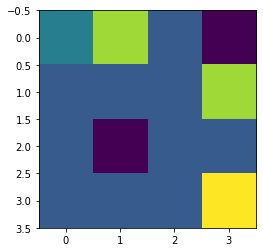

In [19]:
# Define the Environment and reset it. 
# (0, 0) is the initial agent state, (3, 3) is the Terminal state

Model = GridEnvironment(4, 4)
Model.reset()
Model.render()
actions = ["up", "down", "right", "left"] 

In [20]:
# Defining the different parameters
epsilon = 0.9
epsilon_decay = 0.96
alpha = 0.1
gamma = 0.9
episodes_num = 100
max_timestep = 200

done_count = 0
total_reward_per_episode = []
epsilon_arr = []

# Initializing the Q-matrix
random.seed(3)
Q_1 = np.zeros((16, 4)) 
for i in range(len(Q_1)-1):
    for j in range(len(Q_1[0])):
        Q_1[i, j] = random.randint(1, 10)

Q_2 = np.zeros((16, 4)) 
for i in range(len(Q_2)-1):
    for j in range(len(Q_2[0])):
        Q_2[i, j] = random.randint(1, 10)

# print(Q_1)
# print(Q_2)


In [21]:
# Function to choose the next action
def choose_action(Q, position):

    state = position[0]*4 + position[1]
    action = 0
    if random.random() < epsilon:
        action = random.randint(1, 4) - 1
    else:
        action = np.argmax(Q[state, :])

    return action

In [22]:
# Double Q-Learning
for episode in range(episodes_num):

    Model = GridEnvironment(4, 4)
    Model.reset()
    position = [0, 0]
    
    for steps in range(max_timestep):

        Q_chooser = random.randint(1,2)

        action = choose_action(Q_1, position)
        prev_position = position
        step, position, reward, total_reward = Model.step(actions[action])
        prev_state = prev_position[0]*4 + prev_position[1]
        state = position[0]*4 + position[1]

        if Q_chooser == 1:
            est_action = np.argmax(Q_1[state, :])
            Q_1[prev_state, action] = Q_1[prev_state, action] + alpha * (reward + gamma * Q_2[state, est_action] - Q_1[prev_state, action])
        else:
            est_action = np.argmax(Q_2[state, :])
            Q_2[prev_state, action] = Q_2[prev_state, action] + alpha * (reward + gamma * Q_1[state, est_action] - Q_2[prev_state, action])

        # print(Q_chooser)
        # print(Q_2)

        if position == [3, 3]:
            done_count += 1
            break
    
    total_reward_per_episode.append(total_reward)
    epsilon_arr.append(epsilon)

    epsilon = epsilon * epsilon_decay

# print(done_count)
print("The final Q_1 matrix: ")
print(Q_1)
print("The final Q_2 matrix: ")
print(Q_2)

The final Q_1 matrix: 
[[-5.64503405  0.6335943   0.69836534 -3.70876708]
 [-7.91969674 -0.25724027 -0.291695   -0.26154789]
 [-3.01913484  1.93882915  0.73829021  1.32815464]
 [ 1.8241257   5.58759338  0.59061239  3.50233744]
 [ 1.7127854   1.9171662   1.85541508  0.7727761 ]
 [ 1.08691018  1.08490073  1.78292708  0.76353755]
 [ 2.42777289  4.37551493  1.7979919   2.55416583]
 [ 2.85        7.25918978 -0.64067287  4.4337    ]
 [ 1.25139334  1.58500446  1.33385985  0.16186265]
 [ 3.97143731  3.98809903  3.055293    3.46165122]
 [ 4.47331044  3.47108655  7.42158907  1.65889321]
 [ 2.38983225  9.91619239  2.63486464  2.38259961]
 [ 2.92911003  2.08905689  3.10837379  1.57006773]
 [ 4.23730644  2.2959882   4.81553893  4.60710775]
 [ 7.24673428  7.26299     8.83773853  7.45019238]
 [ 0.          0.          0.          0.        ]]
The final Q_2 matrix: 
[[-5.44523146  2.48984666  0.90388464 -3.53336238]
 [-7.0446164  -0.60338958 -0.20560596 -0.6918867 ]
 [-2.19389458  0.58490505 -0.060741

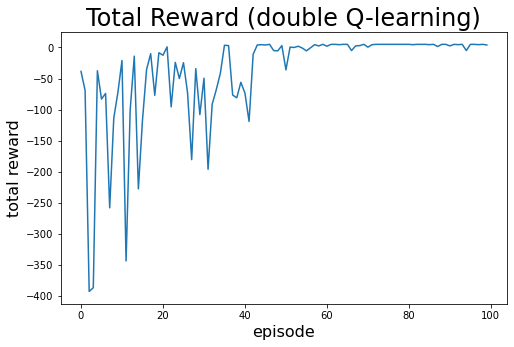

In [23]:
# Visualization graphs - Total Rrwards
y2 = total_reward_per_episode

plt.figure(figsize=(8, 5))
plt.plot(y2)
plt.title('Total Reward (double Q-learning)', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('total reward', fontsize = 16)
plt.show()

## References Used

#### List below all the references you used to complete the assignment

https://www.w3schools.com/python/
<br>https://gym.openai.com/docs/
<br>https://blog.paperspace.com/getting-started-with-openai-gym/
